In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load the data

total_pop_clust = pd.read_csv('Data\TotalPopClusteringResults\cluster_2.csv')
pop_clust = pd.read_csv('Data\ClusteringResults\cluster_4.csv')
pop_clust["total_pop_cluster"] = total_pop_clust["cluster"]
pop_clust.drop(columns=["Unnamed: 0"], inplace=True)

Text(0.5, 0, 'Total Population Cluster')

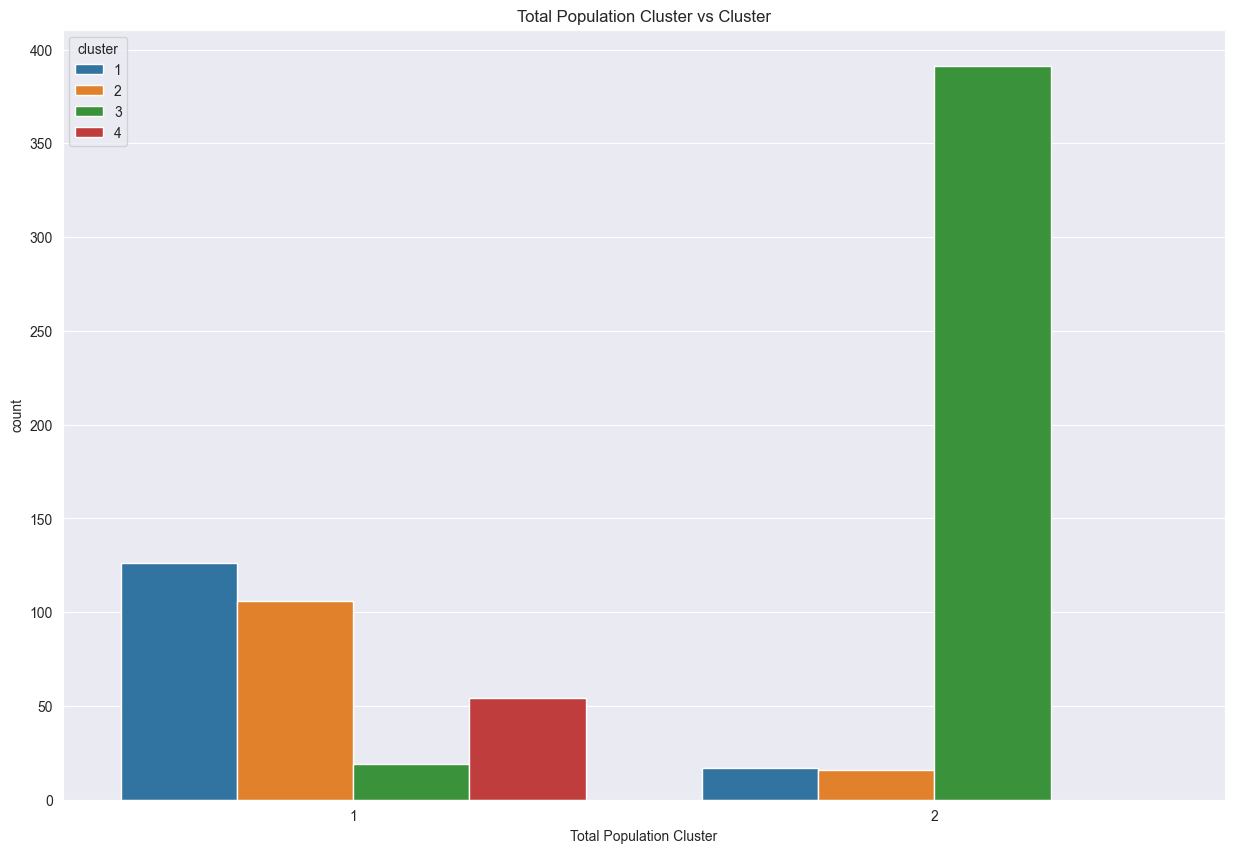

In [3]:
# Show how total pop cluster is sub-divided into cluster

sns.set_style("darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(x="total_pop_cluster", hue="cluster", data=pop_clust)
plt.title("Total Population Cluster vs Cluster")
plt.xlabel("Total Population Cluster")

c:\Users\vedan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 63.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\vedan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 63.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\vedan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\vedan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

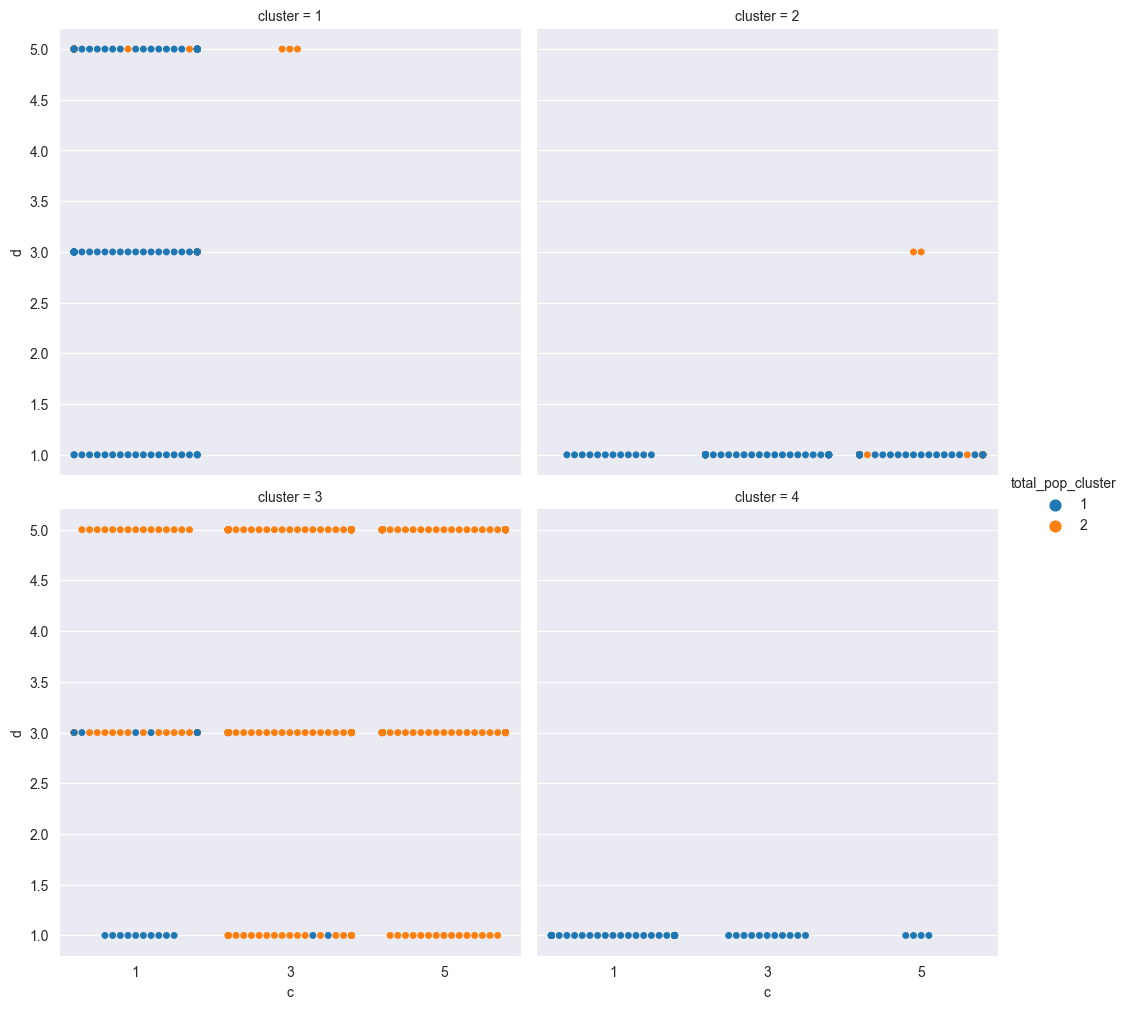

In [4]:
# Plot how the this sub-clustering  with c and d.

sns.catplot(
    x="c",
    y="d",
    hue="total_pop_cluster",
    data=pop_clust,
    kind="swarm",
    col = "cluster",
    col_wrap=2,
    height=5
)

c:\Users\vedan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


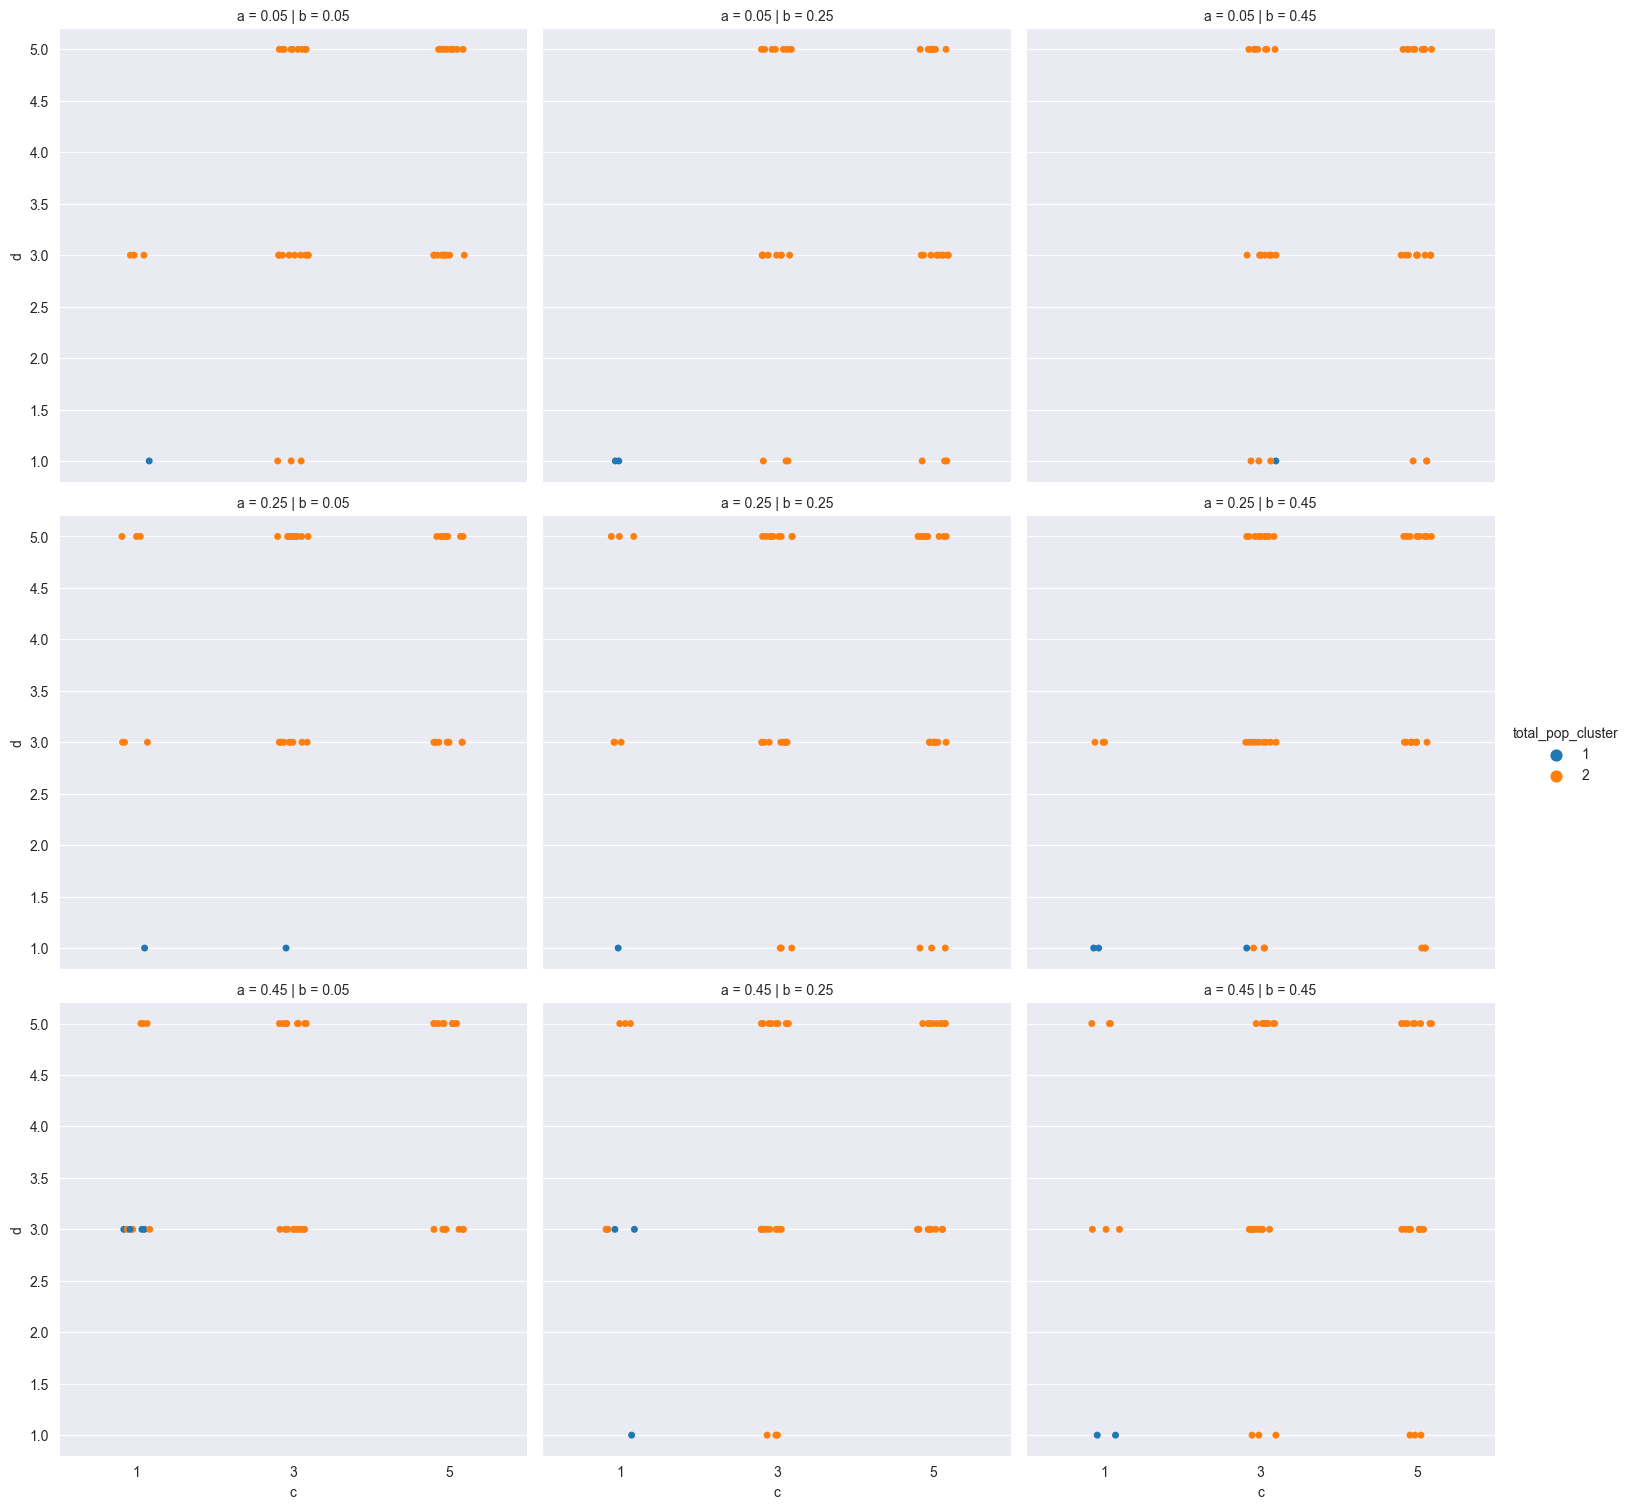

In [5]:
sns.catplot(
    data = pop_clust[pop_clust["cluster"] == 3],
    x = "c",
    y = "d",
    hue = "total_pop_cluster",  
    row = "a",
    col = "b"
)

c:\Users\vedan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


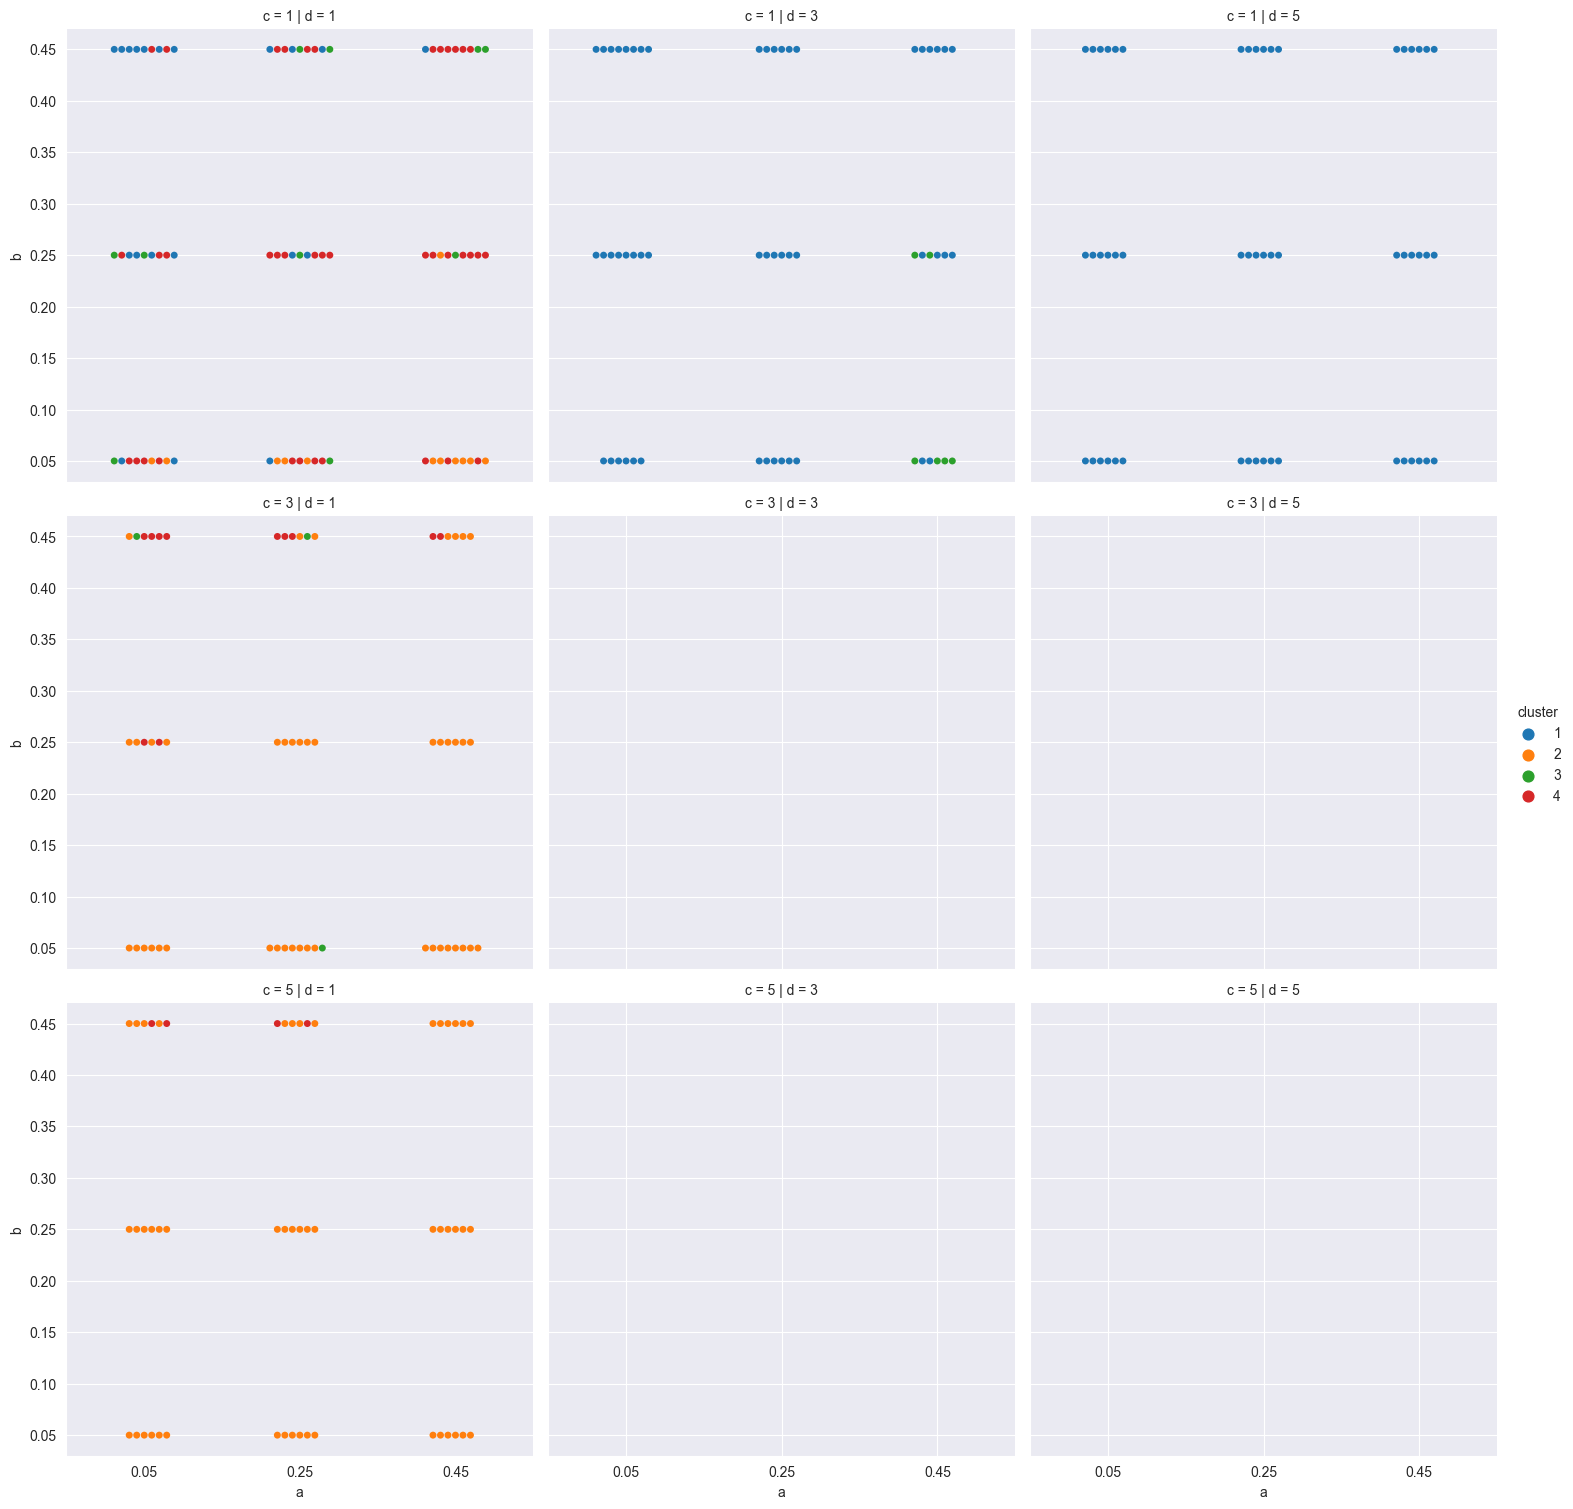

In [6]:
sns.catplot(
    data = pop_clust[pop_clust["total_pop_cluster"] == 1],
    x = "a",
    y = "b",
    hue = "cluster",  
    row = "c",
    col = "d",
    kind = 'swarm'
)

In [7]:
cond_1 = pop_clust["c"] == 1
cond_2 = pop_clust["d"] == 1
cond_3 = pop_clust["total_pop_cluster"] = 1

data = pop_clust[cond_1 & cond_2 & cond_3]

c:\Users\vedan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


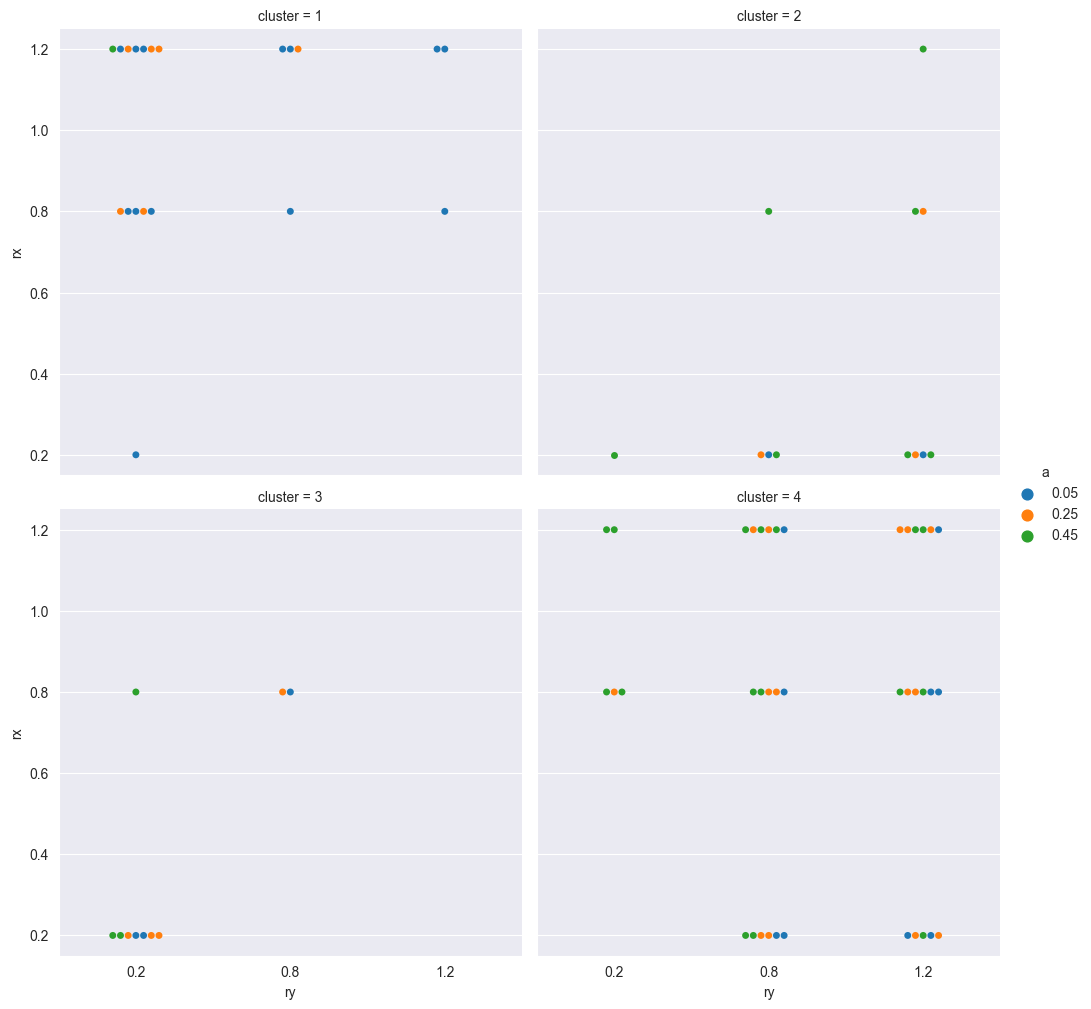

In [8]:
sns.catplot(
    x = "ry",
    y = "rx",
    data = data,
    col="cluster",
    col_wrap=2,
    kind='swarm',
    hue = "a"
)

In [1]:
from scipy.integrate import solve_ivp

In [2]:
def model(t, z, params):
    
    x, y = z
    rx, ry, a, b, c, d = params
    
    return [
        rx * x * (1 - ( x  + c* y)) - a * x + b * y,
        ry * y * (1 - (d*x + y)) - b * y + a * x
    ]
    

rx = 1
ry = 1.5
a = 0.2
b = 0.7

In [3]:
def steady_state(time, model, params):
    sol = solve_ivp(model, [0, time], [0.1, 0.1], args=(params,), t_eval=np.linspace(0, time))
    return sol.y[:,-1]

n = 50

c_range = np.linspace(1, 20, n)
d_range = np.linspace(1, 20, n)

vals = np.meshgrid(c_range, d_range)
steady_states = np.zeros((n, n, 2))

for i, c in enumerate(c_range):
    for j, d in enumerate(d_range):
        steady_states[i, j] = steady_state(5, model, [rx, ry, a, b, c, d])
        

NameError: name 'np' is not defined

Text(50.72222222222221, 0.5, 'c')

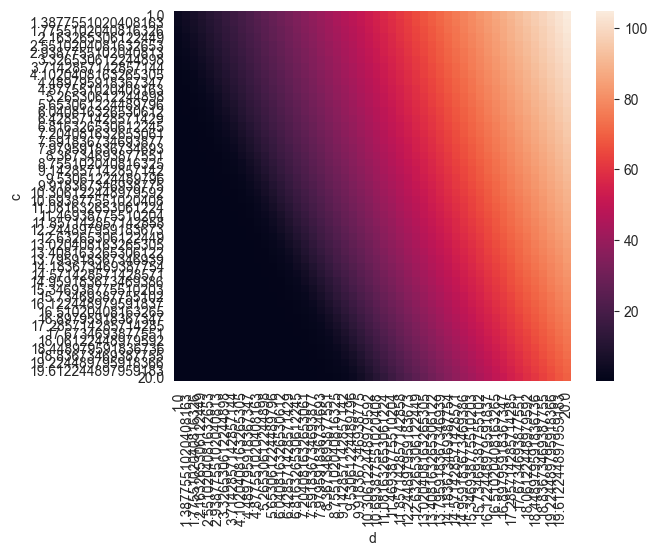

In [27]:
sns.heatmap(steady_states[:,:,0] / steady_states[:,:,1], xticklabels=c_range, yticklabels=d_range)
plt.xlabel("d")
plt.ylabel("c")

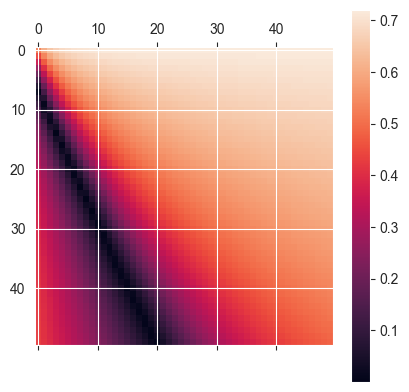

In [28]:
plt.matshow(np.abs(steady_states[:,:,1] - steady_states[:,:,0]))
plt.colorbar()

C:\Users\vedan\AppData\Local\Temp\ipykernel_53572\1164443284.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(z, np.abs(steady_states[:,:,1] - steady_states[:,:,0]), cmap='viridis')


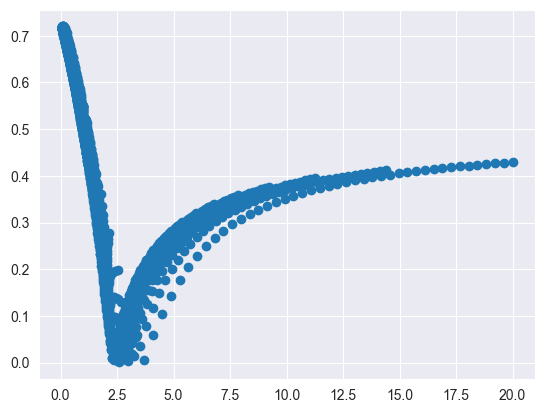

In [29]:
z = np.zeros((n, n, 1))

for i, c in enumerate(c_range):
    for j, d in enumerate(d_range):
        z[i, j] = c/d 

plt.scatter(z, np.abs(steady_states[:,:,1] - steady_states[:,:,0]), cmap='viridis')

In [35]:
# Now same c and d but different a and b

a_range = np.linspace(0.1, 0.9, n)
b_range = np.linspace(0.1, 0.9, n)

vals = np.meshgrid(a_range, b_range)

steady_states = np.zeros((n, n, 2))

for i, a in enumerate(a_range):
    for j, b in enumerate(b_range):
        steady_states[i, j] = steady_state(5, model, [rx, ry, a, b, 2, 3])


Text(50.72222222222221, 0.5, 'b')

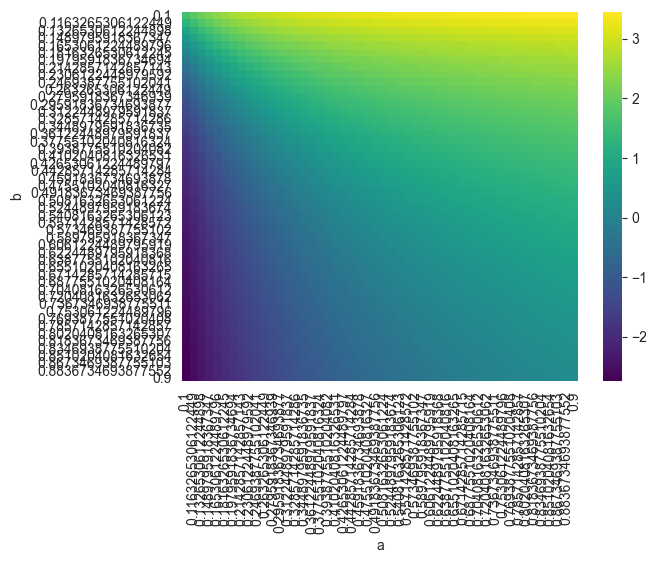

In [46]:
sns.heatmap(np.log(steady_states[:,:,0] / steady_states[:,:,1]), xticklabels=a_range, yticklabels=b_range, cmap='viridis')
plt.xlabel("a")
plt.ylabel("b")

Text(50.72222222222221, 0.5, 'b')

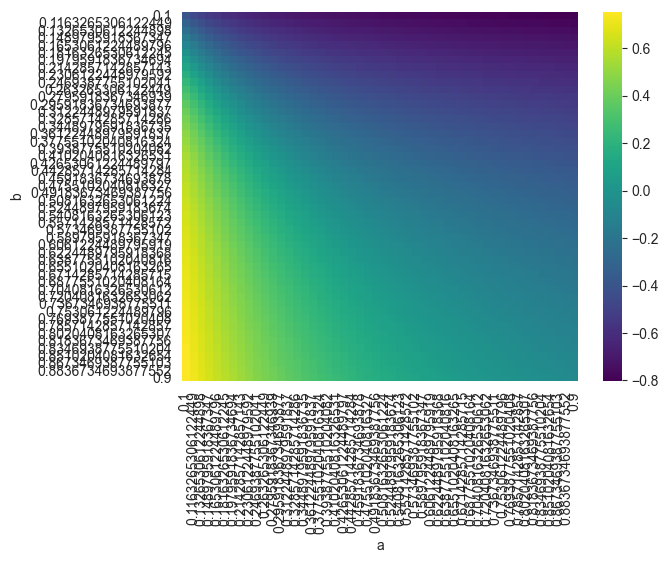

In [43]:
sns.heatmap((steady_states[:,:,1] - steady_states[:,:,0]), xticklabels=a_range, yticklabels=b_range, cmap='viridis')
plt.xlabel("a")
plt.ylabel("b")

In [1]:
import sympy as sp

# We want to find the point where hyperbola as slope -1, 
# r_x x + r_y y - r_x x**2 - r_y y**2 + (c* x + d * y) * x * y = 0

x, y, r_x, r_y, c, d, t = sp.symbols('x y r_x r_y c d t')

# Also specify that all variable are positive

hyper = (r_x * x + r_y * y - r_x * x**2 - r_y*  y**2 - (c * r_x + d * r_y) * x * y )
lang = -t * hyper +  x + y

eq1 = sp.diff(lang, x)
eq2 = sp.diff(lang, y)
eq3 = sp.diff(lang, t)

In [93]:
frac = sp.idiff(hyper, y ,x)
numen = sp.numer(frac)
denom = sp.denom(frac)

sp.solve(numen + denom, x)[0]   - 1 

-1 + (c*r_x*y + d*r_y*y - r_x - 2*r_y*y + r_y)/(c*r_x + d*r_y - 2*r_x)

In [94]:
sol = sp.solve([eq1, eq2, eq3], x, y, t)


params = {  r_x: 1, r_y: 1.2, c: 1, d: 1.2}
[i.subs(params) for i in sol[0]]
[i.subs(params) for i in sol[1]]

[0.419714108356091, -0.383144808082998, 0.912870929175277]

In [117]:
sol[0][0]/ sol[0][0]

1

In [63]:
one_deriv = sp.idiff(hyper, y, x)
one_deriv

(-c*r_x*y - d*r_y*y - 2*r_x*x + r_x)/(c*r_x*x + d*r_y*x + 2*r_y*y - r_y)

In [24]:
two_deriv = sp.idiff(one_deriv, y, x)

sp.factor(sp.numer(two_deriv),y)
sp.factor(sp.denom(two_deriv),x)

-c*r_x*r_y - d*r_y**2 + 2*r_x*r_y + x*(c**2*r_x**2 + 2*c*d*r_x*r_y + d**2*r_y**2 - 4*r_x*r_y)

In [15]:
sp.diff(sp.diff(sp.solve(hyper, y)[1], x), x)

((c**2*r_x**2 + 2*c*d*r_x*r_y + d**2*r_y**2 - 4*r_x*r_y)/sqrt(c**2*r_x**2*x**2 + 2*c*d*r_x*r_y*x**2 - 2*c*r_x*r_y*x + d**2*r_y**2*x**2 - 2*d*r_y**2*x - 4*r_x*r_y*x**2 + 4*r_x*r_y*x + r_y**2) + (-c**2*r_x**2*x - 2*c*d*r_x*r_y*x + c*r_x*r_y - d**2*r_y**2*x + d*r_y**2 + 4*r_x*r_y*x - 2*r_x*r_y)*(c**2*r_x**2*x + 2*c*d*r_x*r_y*x - c*r_x*r_y + d**2*r_y**2*x - d*r_y**2 - 4*r_x*r_y*x + 2*r_x*r_y)/(c**2*r_x**2*x**2 + 2*c*d*r_x*r_y*x**2 - 2*c*r_x*r_y*x + d**2*r_y**2*x**2 - 2*d*r_y**2*x - 4*r_x*r_y*x**2 + 4*r_x*r_y*x + r_y**2)**(3/2))/(2*r_y)

In [5]:
# find discriminant of conic section
x, y, r_x, r_y, c, d, t = sp.symbols('x y r_x r_y c d t')

a = -r_x
b = -r_y
f = r_x/2
g = r_y/2
h = -(c * r_x + d * r_y) / 2
t = 0


matrix = sp.Matrix([[a, h, g], [h, b, f], [g, f, t]])
matrix.det()



sp.latex(matrix.det())


'- \\frac{c r_{x}^{2} r_{y}}{4} - \\frac{d r_{x} r_{y}^{2}}{4} + \\frac{r_{x}^{3}}{4} + \\frac{r_{y}^{3}}{4}'

In [59]:
sp.print_latex(sp.factor(quad.subs({p : 1})))

t \left(t - 1\right) \left(c r_{x} + d r_{y} - r_{x} - r_{y}\right)


In [48]:
t, p = sp.symbols('t p')
quad = (sp.factor(hyper.subs({x : t, y : p-t}), t))


beta = -c*p*r_x - d*p*r_y + 2*p*r_y + r_x - r_y
alpha = c*r_x + d*r_y - r_x - r_y
ceta = -p**2*r_y

beta**2 - 4 * alpha * ceta

p**2*r_y*(4*c*r_x + 4*d*r_y - 4*r_x - 4*r_y) + (-c*p*r_x - d*p*r_y + 2*p*r_y + r_x - r_y)**2

In [55]:
beta = - (c*r_x*t + d*r_y*t - 2*r_y*t - r_y)
alpha = - r_y
ceta = r_x*t**2 + d*r_y*t**2 - r_x*t**2 + r_x*t - r_y*t**2 - r_y*t

beta**2 - 4 * alpha * ceta

4*r_y*(d*r_y*t**2 + r_x*t - r_y*t**2 - r_y*t) + (-c*r_x*t - d*r_y*t + 2*r_y*t + r_y)**2

In [81]:
x, y, r_x, r_y,a, b, m, n, t = sp.symbols('x y r_x r_y a b m n t')

eq_t = sp.simplify((hyper.subs({y: t - x})))
sp.solve(eq_t, x)[0]

(c*r_x*t + d*r_y*t - r_x - 2*r_y*t + r_y - sqrt(c**2*r_x**2*t**2 + 2*c*d*r_x*r_y*t**2 - 2*c*r_x**2*t - 2*c*r_x*r_y*t + d**2*r_y**2*t**2 - 2*d*r_x*r_y*t - 2*d*r_y**2*t + r_x**2 - 4*r_x*r_y*t**2 + 8*r_x*r_y*t - 2*r_x*r_y + r_y**2))/(2*(c*r_x + d*r_y - r_x - r_y))

In [89]:
eq1 = r_x * x * (1 - ( x  + c* y)) - m * ( (1 - n)*x + (1 + n) * y)
eq2 = r_y * y * (1 - (d*x + y)) - m * ( (1 + n)*x + (1 - n) * y)

-r_x*t**2 + r_x*t - r_y*(1 - t)**2 + r_y*(1 - t) - t*(1 - t)*(c*r_x + d*r_y)

In [97]:
eq1 = eq1.subs({y: t - x})
eq2 = eq2.subs({y: t - x})

In [122]:
sp.expand(eq1) 
t_x = sp.solve(eq1, t)[0]

In [124]:
t_x.subs({m: 0.2, n: 0.7, r_x: 1, r_y: 1.5, c: 1, d: 1.5})

x*(c*r_x*x + 2*m*n - r_x*x + r_x)/(c*r_x*x + m*n + m)